In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("performance.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   StudyHours            60 non-null     int64  
 1   AttendancePercentage  60 non-null     int64  
 2   PreviousGPA           60 non-null     float64
 3   PracticeTestScore     60 non-null     int64  
 4   FinalGrade            60 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 2.5+ KB
None


In [3]:
print(df.head())

   StudyHours  AttendancePercentage  PreviousGPA  PracticeTestScore FinalGrade
0           8                    95          3.8                 90          A
1           7                    92          3.6                 88          A
2           9                    98          3.9                 94          A
3           6                    90          3.5                 85          A
4           7                    93          3.7                 89          A


In [4]:
df.tail()

,StudyHours,AttendancePercentage,PreviousGPA,PracticeTestScore,FinalGrade
55,3,75,2.7,65,C
56,2,69,2.5,58,D
57,1,58,2.1,46,D
58,9,98,4.0,97,A
59,8,96,3.9,94,A


In [5]:
df.describe()


,StudyHours,AttendancePercentage,PreviousGPA,PracticeTestScore
count,60.000000,60.000000,60.000000,60.000000
mean,4.633333,80.233333,3.030000,72.916667
std,2.517509,12.990696,0.630926,15.789174
min,1.000000,55.000000,1.900000,45.000000
25%,2.000000,71.500000,2.575000,60.750000
50%,4.500000,82.000000,3.050000,75.500000
75%,7.000000,91.250000,3.600000,87.250000
max,9.000000,100.000000,4.000000,98.000000


In [6]:
df.sample(10)


,StudyHours,AttendancePercentage,PreviousGPA,PracticeTestScore,FinalGrade
49,1,56,2.0,47,D
24,4,79,2.8,69,C
3,6,90,3.5,85,A
22,6,89,3.5,84,B
0,8,95,3.8,90,A
21,7,91,3.6,87,A
5,5,85,3.2,78,B
6,6,88,3.3,80,B
11,4,78,2.9,68,C
52,6,90,3.5,85,B


In [7]:
#check for missing value
print(df.isnull())

    StudyHours  AttendancePercentage  PreviousGPA  PracticeTestScore  \
0        False                 False        False              False   
1        False                 False        False              False   
2        False                 False        False              False   
3        False                 False        False              False   
4        False                 False        False              False   
5        False                 False        False              False   
6        False                 False        False              False   
7        False                 False        False              False   
8        False                 False        False              False   
9        False                 False        False              False   
10       False                 False        False              False   
11       False                 False        False              False   
12       False                 False        False              F

In [8]:
print(df.isnull().sum())

StudyHours              0
AttendancePercentage    0
PreviousGPA             0
PracticeTestScore       0
FinalGrade              0
dtype: int64


In [9]:
count=df["FinalGrade"].value_counts()
print(count)

FinalGrade
A    18
B    14
C    14
D    14
Name: count, dtype: int64


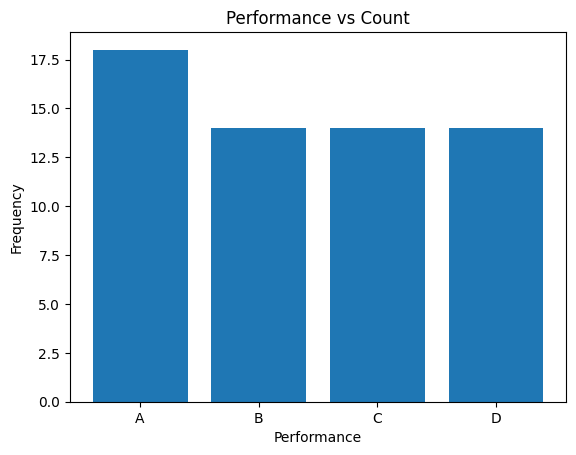

In [11]:
count=df["FinalGrade"].value_counts()
plt.Figure(figsize=(6,5))
plt.bar(x=count.index,height=count.values)
plt.xlabel("Performance")
plt.ylabel("Frequency")
plt.title("Performance vs Count")
plt.savefig("performance vs Count")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# split features and target
x = df.drop(columns=['FinalGrade'])
y = df['FinalGrade']

# train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# print shapes
print(f"length of x_train and y_train = {x_train.shape} {y_train.shape}")
print(f"length of x_test and y_test = {x_test.shape} {y_test.shape}")

length of x_train and y_train = (48, 4) (48,)
length of x_test and y_test = (12, 4) (12,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [15]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_preds=knn.predict(x_test)
print(f"Accuracy= {accuracy_score(y_test,y_preds)}")
print(f"classification Report\n{classification_report(y_test,y_preds)}")

Accuracy= 0.9166666666666666
classification Report
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00         2
           C       1.00      0.67      0.80         3
           D       0.80      1.00      0.89         4

    accuracy                           0.92        12
   macro avg       0.95      0.92      0.92        12
weighted avg       0.93      0.92      0.91        12



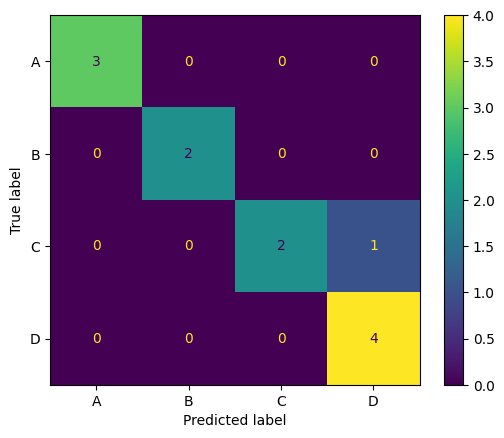

In [16]:
cm=confusion_matrix(y_test,y_preds)
cm_plot=ConfusionMatrixDisplay(
    confusion_matrix=cm,display_labels=df['FinalGrade'].unique()
)
cm_plot.plot()
plt.savefig("cm.png")
plt.show()

In [17]:
import joblib
joblib.dump(knn,"knn_model.joblib")
print("success")

success
